# Hyperboloid valued data, i.e. $\mathbb{H}_d$, on line- and grid-graph, i.e. $\mathbb{H}_d$-signal and images

### here, a generailzation for any dimension $d$ and visulizations for $d \in \{1,2\}$
### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import interpolate

import imp
import relaxed_tikhonov_sphere
import relaxed_tikhonov_sphere_image

# from structure_tensor import eig_special_2d, structure_tensor_2d

In [9]:
imp.reload(relaxed_tikhonov_sphere)
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/hyperboloid/relaxed_tikhonov_sphere_image.py'>

In [10]:
data_smooth_signal = relaxed_tikhonov_sphere.sample_smooth_hyperbolic_signal(1,20)

minkowsky inner-prod test :  1.2390805207033134e-14


In [11]:
data_smooth_signal = relaxed_tikhonov_sphere.sample_smooth_hyperbolic_signal_h(1,20)

minkowsky inner-prod test :  9.764914844410565e-15


In [12]:
np.shape(data_smooth_signal)

(2, 400)

In [13]:
data_smooth_image = relaxed_tikhonov_sphere_image.sample_smooth_hyperbolic_image(2,11)

minkowsky inner-prod test :  4.6040936783931876e-14


In [14]:
sig = 0.6
noise_smooth_signal = data_smooth_signal + sig*np.random.randn(2,np.shape(data_smooth_signal)[1])
#noise_smooth_image = data_smooth_image + sig*np.random.randn(2,np.shape(data_smooth_image)[1],np.shape(data_smooth_image)[1])

In [16]:
sig = 0.6
noise_smooth_signal = relaxed_tikhonov_sphere.tangtial_hyper_noise_signal(data_smooth_signal,sig)
#noise_smooth_image = relaxed_tikhonov_sphere_image.TangtialHyperNoise(data_smooth_image,sig)

AttributeError: module 'relaxed_tikhonov_sphere' has no attribute 'tangtial_hyper_noise_signal'

In [9]:
np.shape(noise_smooth_signal)
np.shape(noise_smooth_image)

NameError: name 'noise_smooth_image' is not defined

### Main algorithm

- ADMM_red_hyper : solving the proposed simplified and generalized convex optimization problem in ...

In [14]:
sol_x_tv, sol_v_tv = relaxed_tikhonov_sphere.ADMM_TV_red_hyper_edge(noise_smooth_signal, data_smooth_signal, 0.75, 1, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
0 		|   6.55e+02 	|   1.84e+01 		|   1.09e+01
100 		|   1.11e+02 	|   3.81e-02 		|   4.17e-02
200 		|   1.03e+02 	|   1.28e-02 		|   1.29e-02
300 		|   1.01e+02 	|   5.37e-03 		|   5.19e-03
400 		|   1.00e+02 	|   2.42e-03 		|   2.30e-03
500 		|   1.00e+02 	|   1.13e-03 		|   1.06e-03
600 		|   1.00e+02 	|   5.36e-04 		|   5.03e-04
700 		|   1.00e+02 	|   2.56e-04 		|   2.40e-04
800 		|   1.00e+02 	|   1.23e-04 		|   1.15e-04
829 		|   1.00e+02 	|   1.00e-04 		|   9.33e-05


In [15]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x_tv - data_smooth_signal)**2/np.size(sol_x_tv[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_signal - data_smooth_signal)**2/np.size(sol_x_tv[0,:]))
print('MAE(Solution, Data) = ', np.mean(np.sum(np.abs(sol_x_tv - data_smooth_signal),0)), '\t|','MAE(Noise, Data) = ', np.mean(np.sum(np.abs(noise_smooth_signal - data_smooth_signal),0)))

MSE(Solution, Data) =  0.12187616244160143 	| MSE(Noise, Data) =  0.44292342138617746
MAE(Solution, Data) =  0.36790759253033944 	| MAE(Noise, Data) =  0.6482084922829311


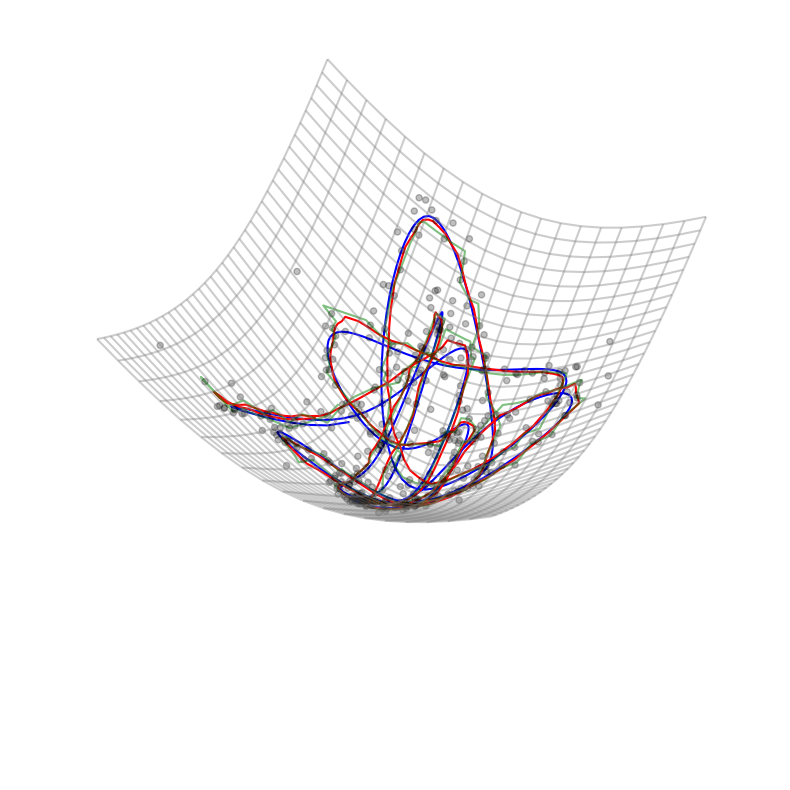

In [69]:
relaxed_tikhonov_sphere.plot_hyper2(noise_smooth_signal, data_smooth_signal, sol_x, sol_x_tv)

In [16]:
sol_x, sol_v, sol_f, sol_l= relaxed_tikhonov_sphere.ADMM_red_hyper(noise_smooth_signal, data_smooth_signal, 6, 0.1, 10001)

iteration 	| func-value 	| mikwosky-error 	| error
--------------------------------------------------------------------------
0 		|  -2.99e+07 	|   1.35e+01 		|   5.85e+01
100 		|   1.14e+04 	|   2.79e-01 		|   2.37e-02
200 		|   1.11e+04 	|   3.80e-02 		|   5.31e-04
300 		|   1.11e+04 	|   4.38e-03 		|   1.91e-04


In [17]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x - data_smooth_signal)**2/np.size(sol_x[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_signal - data_smooth_signal)**2/np.size(sol_x[0,:]))

MSE(Solution, Data) =  0.08956596513769544 	| MSE(Noise, Data) =  0.44292342138617746


In [22]:
sol_x, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_red_hyper2D(noise_smooth_image, data_smooth_image, 3, 0.1, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
0 		|  -4.64e+09 	|   5.42e+01 		|   2.06e+02
100 		|   9.32e+06 	|   1.83e+00 		|   1.73e-01
200 		|   1.00e+07 	|   4.76e-01 		|   4.66e-02
300 		|   1.02e+07 	|   1.73e-01 		|   1.69e-02
400 		|   1.03e+07 	|   7.15e-02 		|   6.95e-03
500 		|   1.03e+07 	|   3.17e-02 		|   3.06e-03
600 		|   1.03e+07 	|   1.46e-02 		|   1.41e-03
700 		|   1.04e+07 	|   6.89e-03 		|   6.63e-04
800 		|   1.04e+07 	|   3.31e-03 		|   3.18e-04
900 		|   1.04e+07 	|   1.60e-03 		|   1.54e-04


In [23]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x - data_smooth_image)**2/np.size(sol_x[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_image - data_smooth_image)**2/np.size(sol_x[0,:]))

MSE(Solution, Data) =  0.22090622457137846 	| MSE(Noise, Data) =  1.5160040866562636


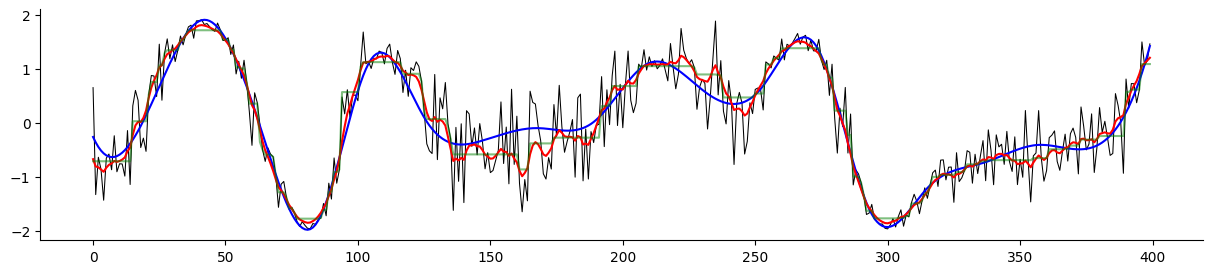

In [18]:
relaxed_tikhonov_sphere.plot_hyper1(noise_smooth_signal, data_smooth_signal, sol_x, sol_x_tv)

In [20]:
from matplotlib import image
from PIL import Image
import cv2
from scipy import interpolate
from scipy.interpolate import CubicSpline
from matplotlib import cm

### RETINA - Experiment, Gaussian image processing 

In [21]:
def pi_3(Mu,Sig):
    return [Mu/np.sqrt(2), Sig]

def inv_pi_3(Mu,Sig):
    return [Mu*np.sqrt(2), Sig]

def pi_2(X,Y):
    eta = X**2 + (Y+1)**2
    return [2*X/eta, (X**2 + Y**2 - 1)/eta]

def inv_pi_2(X,Y):
    eta = X**2 + (Y-1)**2
    return [2*X/eta, (1 - X**2 - Y**2)/eta]

def pi_1(X,Y):
    n,n = np.shape(X)
    D = np.zeros((3,n,n))

    eta = 1 - X**2 - Y**2

    D[0,:,:] = 1/eta*(2*X)
    D[1,:,:] = 1/eta*(2*Y)
    D[2,:,:] = 1/eta*(2 - eta)

    return D

def inv_pi_1(D):
    DD = D[0:2,:,:]
    eta = 1/(1+D[2,:,:])

    return [eta*DD[0,:,:], eta*DD[1,:,:]]


def transof_MuSig_H2(Mu,Sig):
    Mu1, Sig1 = pi_3(Mu,Sig)
    Mu2, Sig2 = pi_2(Mu1,Sig1)
    D = pi_1(Mu2,Sig2)

    return D

def inv_transof_MuSig_H2(D):
    X,Y = inv_pi_1(D)
    Mu1, Sig1 = inv_pi_2(X,Y)
    Mu, Sig = inv_pi_3(Mu1,Sig1)
    
    return [Mu, Sig]

In [24]:
import scipy.io as sio

ret = sio.loadmat('Retina.mat')
ret = ret.get('fn_hyper')

In [25]:
Mu = ret[0,:,:]
Sig = ret[1,:,:]

Data_Ret = transof_MuSig_H2(Mu,Sig)

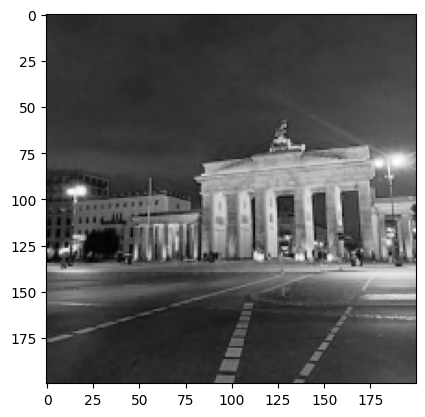

In [26]:
# img = cv2.imread('cameraman.jpg')
# img = cv2.imread('concert_hall_1.jpeg')
img = cv2.imread('brandenburg_gate_1.jpeg')
# img = cv2.imread('tu_building.jpeg')
# img = cv2.imread('original_input.png')

imgsmall = cv2.resize(img.copy(), (200,200), interpolation =cv2.INTER_AREA)

imgsmallconv = imgsmall[:,:,0]/np.max(imgsmall[:,:,0])
plt.imshow(-imgsmallconv, 'Greys')

In [27]:
Mu_rand = imgsmallconv + 0.1*np.random.randn(200,200)
Sig_rand = imgsmallconv + 0.1*np.abs(np.random.randn(200,200))

Data_rand = transof_MuSig_H2(Mu_rand,Sig_rand)

In [28]:
imgsample = np.zeros((20,200,200))

for i in range(20):
    imgsample[i,:,:] = imgsmallconv + 0.3*np.random.randn()*np.random.randn(200,200)

Mu_rand = 1/20*np.sum(imgsample,0)
#Mu_rand_matrix = np.zeros((20,200,200))
#for i in range(20):
#    Mu_rand_matrix[i,:,:] = Mu_rand
Sig_rand = np.sqrt(1/20*np.sum((imgsample - Mu_rand)**2,0))

Data_rand = transof_MuSig_H2(Mu_rand,Sig_rand)

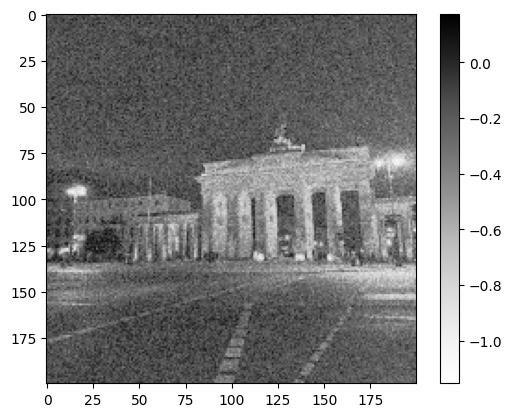

In [29]:
plt.imshow(-Mu_rand, 'Greys')
plt.colorbar()

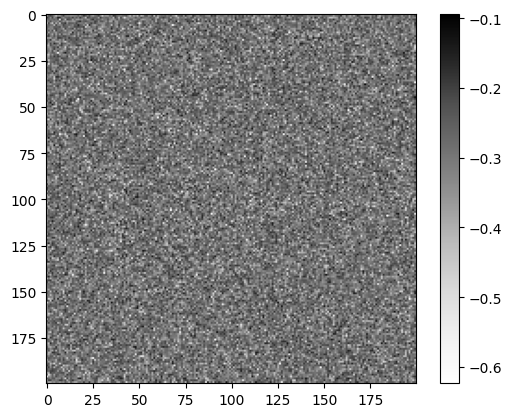

In [30]:
plt.imshow(-Sig_rand, 'Greys')
plt.colorbar()

In [144]:
np.linalg.norm(Data_Ret[0,:,:]**2 + Data_Ret[1,:,:]**2 - Data_Ret[2,:,:]**2 + 1), np.linalg.norm(Data_rand[0,:,:]**2 + Data_rand[1,:,:]**2 - Data_rand[2,:,:]**2 + 1)


(3.229242012687474e-12, 7.367377754415913e-13)

In [31]:
small_Mu = cv2.resize(Mu.copy(), (200,200), interpolation =cv2.INTER_AREA)
small_Sig = cv2.resize(Sig.copy(), (200,200), interpolation =cv2.INTER_AREA)

small_Data_Ret = transof_MuSig_H2(small_Mu,small_Sig)

In [32]:
d = np.size(small_Data_Ret[:,0,0])
np.linalg.norm(1 + np.sum(small_Data_Ret[0:d-1,:,:]**2,0) - small_Data_Ret[d-1,:,:]**2)

9.540582558152644e-13

In [33]:
np.linalg.norm(small_Data_Ret[0,:,:]**2 + small_Data_Ret[1,:,:]**2 - small_Data_Ret[2,:,:]**2 + 1)

9.508647930271962e-13

In [50]:
sol_x, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_red_hyper2D(Data_rand, Data_rand, 6, 10, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
0 		|  -2.93e+09 	|   5.13e-02 		|   2.00e+02
100 		|   1.11e+07 	|   1.47e-02 		|   4.39e-01
200 		|   1.35e+07 	|   9.68e-03 		|   2.93e-01
300 		|   1.48e+07 	|   7.43e-03 		|   2.25e-01
400 		|   1.58e+07 	|   6.13e-03 		|   1.85e-01
500 		|   1.65e+07 	|   5.27e-03 		|   1.57e-01
600 		|   1.71e+07 	|   4.65e-03 		|   1.37e-01
700 		|   1.76e+07 	|   4.18e-03 		|   1.22e-01
800 		|   1.81e+07 	|   3.80e-03 		|   1.10e-01
900 		|   1.84e+07 	|   3.49e-03 		|   9.98e-02
1000 		|   1.88e+07 	|   3.24e-03 		|   9.15e-02


In [20]:
sol_Mu, sol_Sig = inv_transof_MuSig_H2(sol_x)

In [92]:
sol_x, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_red_hyper2D(small_Data_Ret, small_Data_Ret, 3, 10, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
0 		|  -7.46e+08 	|   2.66e-01 		|   2.00e+02
100 		|   8.51e+06 	|   4.10e-02 		|   6.59e-01
200 		|   1.23e+07 	|   2.59e-02 		|   4.36e-01
300 		|   1.48e+07 	|   1.96e-02 		|   3.36e-01
400 		|   1.66e+07 	|   1.61e-02 		|   2.77e-01
500 		|   1.81e+07 	|   1.38e-02 		|   2.38e-01
600 		|   1.94e+07 	|   1.22e-02 		|   2.09e-01
700 		|   2.05e+07 	|   1.09e-02 		|   1.87e-01
800 		|   2.15e+07 	|   9.97e-03 		|   1.70e-01
900 		|   2.24e+07 	|   9.18e-03 		|   1.56e-01
1000 		|   2.32e+07 	|   8.53e-03 		|   1.44e-01


In [51]:
sol_small_Mu_2, sol_small_Sig_2 = inv_transof_MuSig_H2(sol_x)

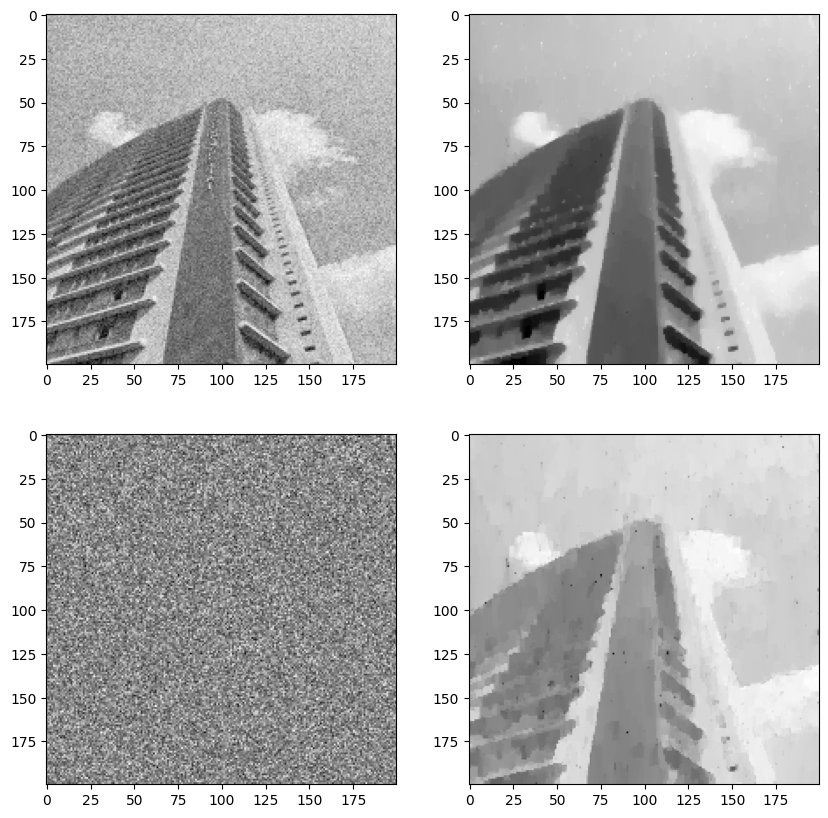

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

#axs[0, 0].imshow(-small_Mu, 'Greys')
axs[0, 0].imshow(-Mu_rand, 'Greys')
axs[0, 1].imshow(-sol_small_Mu_1, 'Greys')
#axs[1, 0].imshow(-small_Sig, 'Greys')
axs[1, 0].imshow(-Sig_rand, 'Greys')
axs[1, 1].imshow(-sol_small_Sig_1, 'Greys')
# fig.savefig('camera_man_mu_sig_2_1_L2_red_proj.pdf', dpi = 300)

In [34]:
#
# retina denoising
#

sol_x_tv, sol_v = relaxed_tikhonov_sphere_image.ADMM_TV_red_hyper2D_edge(small_Data_Ret, small_Data_Ret, 0.3, 10, 1, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
init. 		|   8.49e+05 	|   2.00e+02 		|   3.47e+02
0 		|   8.16e+05 	|   1.00e+00 		|   6.32e-02
100 		|   3.59e+05 	|   7.81e-04 		|   3.65e-03
200 		|   2.82e+05 	|   4.64e-04 		|   2.13e-03
300 		|   2.36e+05 	|   3.41e-04 		|   1.52e-03
400 		|   2.05e+05 	|   2.75e-04 		|   1.18e-03
500 		|   1.82e+05 	|   2.31e-04 		|   9.68e-04
600 		|   1.64e+05 	|   2.01e-04 		|   8.16e-04
700 		|   1.49e+05 	|   1.78e-04 		|   7.03e-04
800 		|   1.37e+05 	|   1.60e-04 		|   6.15e-04
900 		|   1.27e+05 	|   1.45e-04 		|   5.45e-04
1000 		|   1.18e+05 	|   1.33e-04 		|   4.88e-04
1000 		|   1.18e+05 	|   1.33e-04 		|   4.88e-04


In [60]:
#
# random denoising
# 

sol_x_tv, sol_v = relaxed_tikhonov_sphere_image.ADMM_TV_red_hyper2D_edge(Data_rand, Data_rand, 0.9, 10, 1, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
init. 		|   2.30e+05 	|   2.00e+02 		|   3.47e+02
0 		|   2.22e+05 	|   1.00e+00 		|   3.45e-02
100 		|   5.83e+04 	|   5.41e-04 		|   2.42e-03
200 		|   4.23e+04 	|   2.99e-04 		|   1.36e-03
300 		|   3.45e+04 	|   2.12e-04 		|   9.22e-04
400 		|   2.99e+04 	|   1.67e-04 		|   6.82e-04
500 		|   2.71e+04 	|   1.38e-04 		|   5.29e-04
600 		|   2.52e+04 	|   1.17e-04 		|   4.24e-04
700 		|   2.38e+04 	|   1.02e-04 		|   3.47e-04
711 		|   2.37e+04 	|   1.00e-04 		|   3.40e-04


In [155]:
# sol_x_proj = relaxed_tikhonov_sphere_image.proj_Hd_vec(sol_x_tv)

In [61]:
sol_small_Mu_1, sol_small_Sig_1 = inv_transof_MuSig_H2(sol_x_tv)

In [69]:
print('SNR MU \t\t\t| SNR SIG')
print(np.mean(sol_small_Mu_1**2)/np.var(small_Mu) , '\t|', np.mean(sol_small_Sig_1**2)/np.var(small_Sig))
print('PSNR MU \t\t| PSNR SIG')
print(10*np.log10(np.max(small_Mu)**2/np.mean((sol_small_Mu_1)**2)) , '\t|', 10*np.log10(np.max(small_Sig)**2/np.mean((sol_small_Sig_1)**2)))
print('PSNR MU \t\t| PSNR SIG')
print(10*np.log10(np.max(sol_small_Mu_1)**2/np.mean((sol_small_Mu_1 - small_Mu)**2)) , '\t|', 10*np.log10(np.max(sol_small_Sig_1)**2/np.mean((sol_small_Sig_1 - small_Sig)**2)))

SNR MU 			| SNR SIG
5.985914476193123 	| 12.300996936247083
PSNR MU 		| PSNR SIG
6.149042250184032 	| 5.702458272826348
PSNR MU 		| PSNR SIG
29.371790005966233 	| 27.187957422503608


In [212]:
print('SNR MU \t\t\t| SNR SIG')
print(np.mean(sol_small_Mu_1**2)/np.var(Mu_rand) , '\t|', np.mean(sol_small_Sig_1**2)/np.var(Sig_rand))
print('PSNR MU \t\t| PSNR SIG')
print(10*np.log10(np.max(Mu_rand)**2/np.mean((sol_small_Mu_1)**2)) , '\t|', 10*np.log10(np.max(Sig_rand)**2/np.mean((sol_small_Sig_1)**2)))

SNR MU 			| SNR SIG
2.497679986251978 	| 30.741912653486605
PSNR MU 		| PSNR SIG
12.697366049530798 	| 5.441790792718162


In [159]:
x_tv_mu_un = relaxed_tikhonov_sphere_image.ADRA(Mu_rand, 1, 0.1, 1000)
x_tv_sig_un = relaxed_tikhonov_sphere_image.ADRA(Sig_rand, 1, 0.1, 1000)

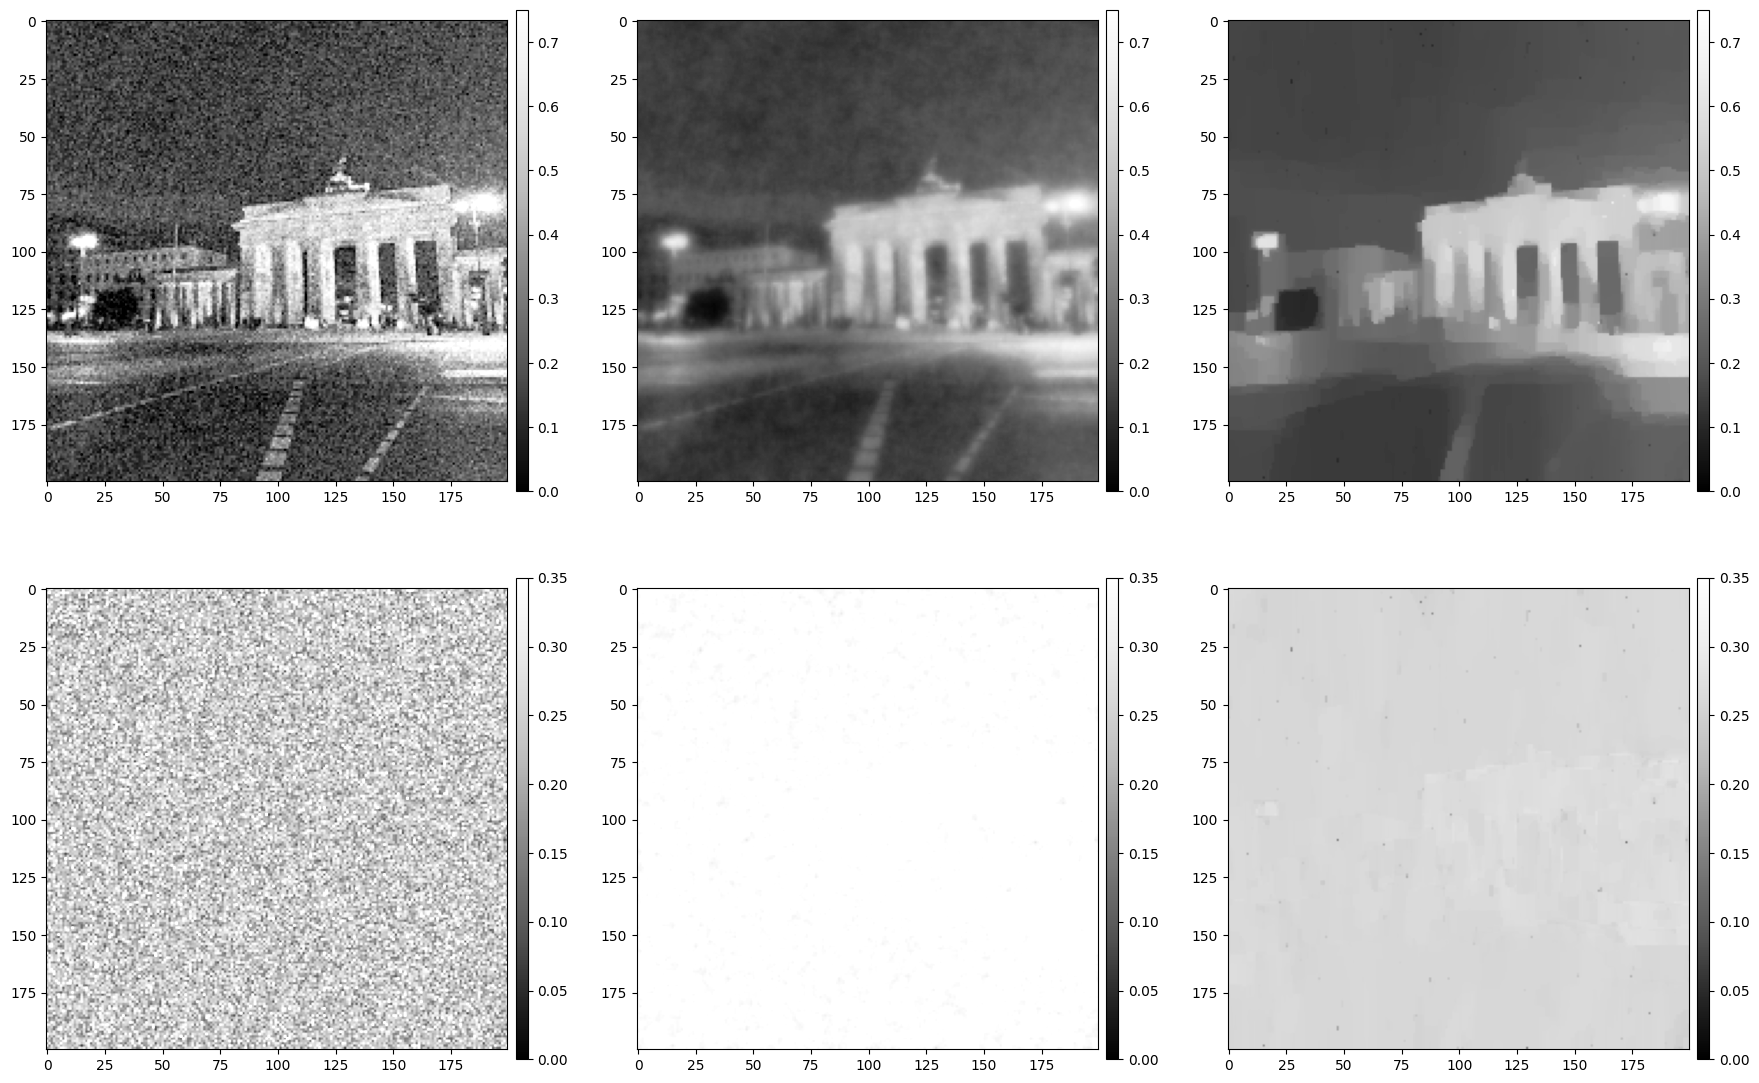

In [62]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))
ax1 = axs[0, 0].imshow(Mu_rand, vmax=0.75, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax1,ax=axs[0, 0],shrink=0.8,  pad=0.015, aspect=40)
ax2 = axs[0, 1].imshow(sol_small_Mu_2, vmax=0.75, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax2,ax=axs[0, 1],shrink=0.8,  pad=0.015, aspect=40)
ax3 = axs[0, 2].imshow(sol_small_Mu_1, vmax=0.75, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax3,ax=axs[0, 2],shrink=0.8,  pad=0.015, aspect=40)
ax4 = axs[1, 0].imshow(Sig_rand, vmax=0.35, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax4,ax=axs[1, 0],shrink=0.8,  pad=0.015, aspect=40)
ax5 = axs[1, 1].imshow(sol_small_Sig_2, vmax=0.35, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax5,ax=axs[1, 1],shrink=0.8, pad=0.015, aspect=40)
ax6 = axs[1, 2].imshow(sol_small_Sig_1, vmax=0.35, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax6,ax=axs[1, 2],shrink=0.8, pad=0.015, aspect=40)
plt.tight_layout()
plt.savefig('concept_ADMM_L2_6_10_L1_0.9_1.pdf', dpi=600)

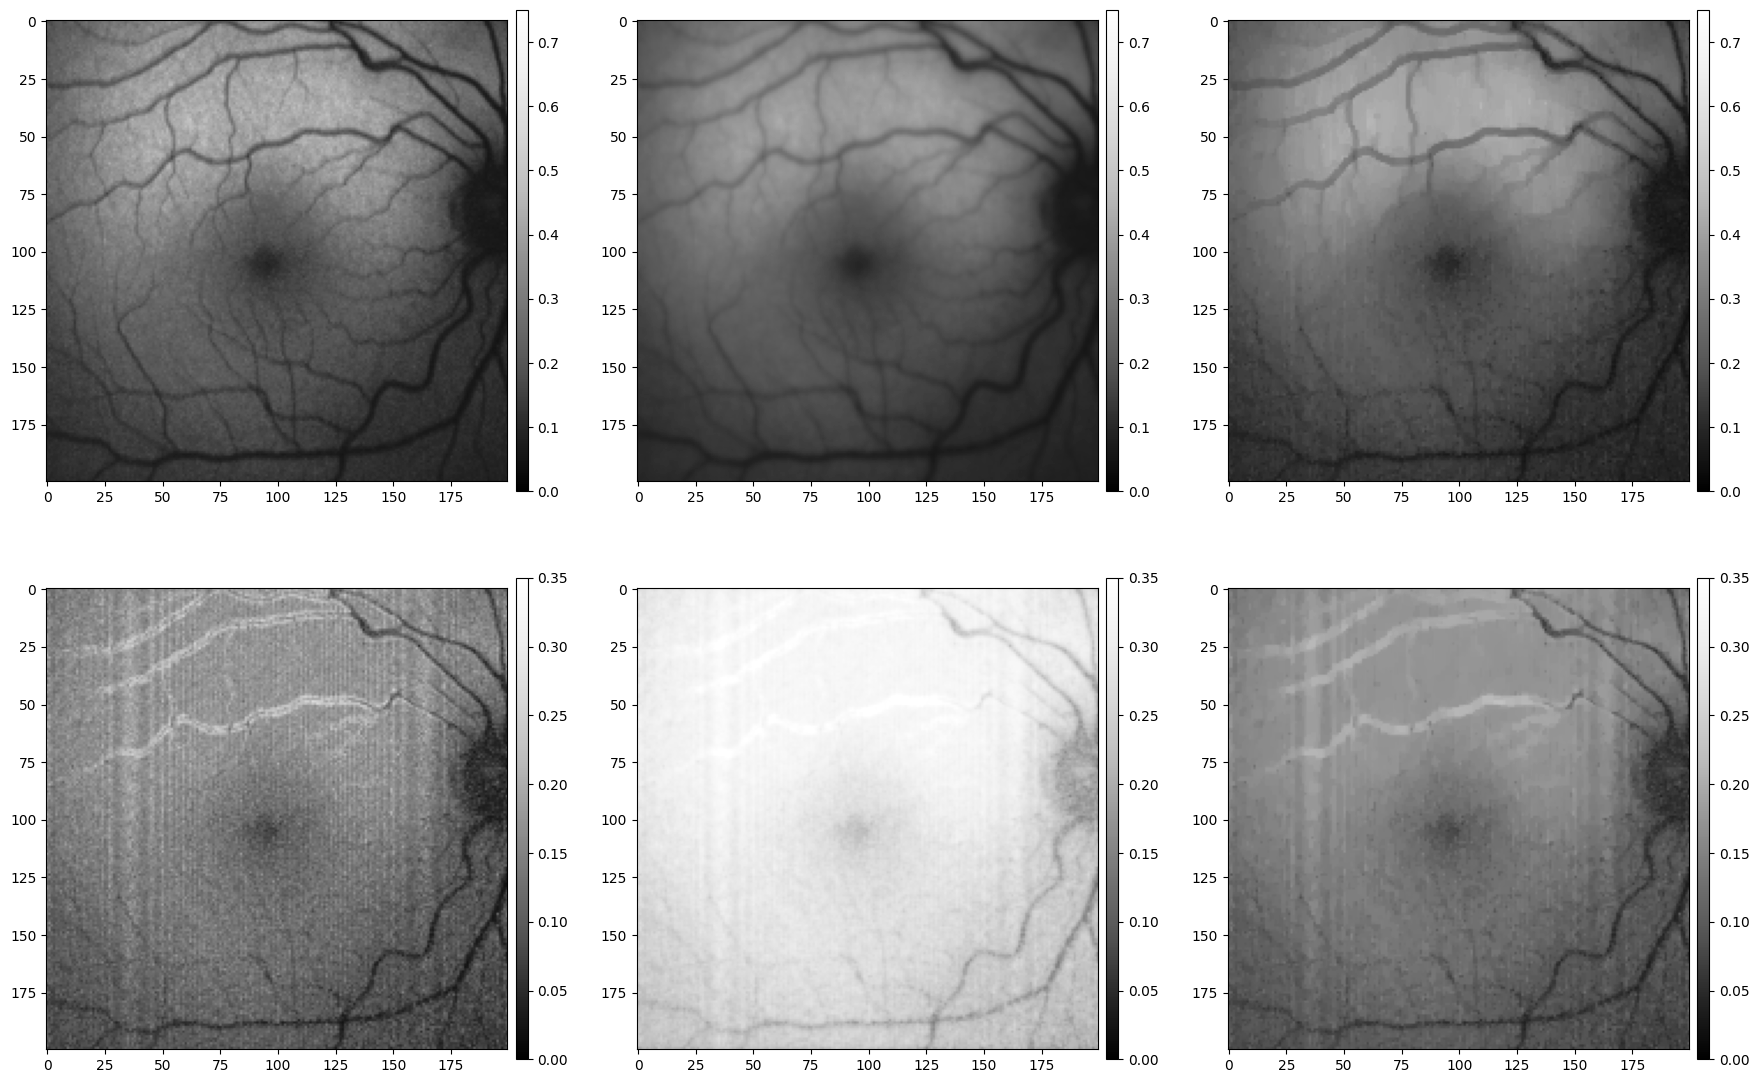

In [100]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))
ax1 = axs[0, 0].imshow(small_Mu, vmax=0.75, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax1,ax=axs[0, 0],shrink=0.8,  pad=0.015, aspect=40)
ax2 = axs[0, 1].imshow(sol_small_Mu_2, vmax=0.75, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax2,ax=axs[0, 1],shrink=0.8,  pad=0.015, aspect=40)
ax3 = axs[0, 2].imshow(sol_small_Mu_1, vmax=0.75, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax3,ax=axs[0, 2],shrink=0.8,  pad=0.015, aspect=40)
ax4 = axs[1, 0].imshow(small_Sig, vmax=0.35, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax4,ax=axs[1, 0],shrink=0.8,  pad=0.015, aspect=40)
ax5 = axs[1, 1].imshow(sol_small_Sig_2, vmax=0.35, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax5,ax=axs[1, 1],shrink=0.8, pad=0.015, aspect=40)
ax6 = axs[1, 2].imshow(sol_small_Sig_1, vmax=0.35, vmin=0.0, cmap='Greys_r')
fig.colorbar(mappable=ax6,ax=axs[1, 2],shrink=0.8, pad=0.015, aspect=40)
plt.tight_layout()
plt.savefig('comp_ADMM_L2_3_10_L1_0.15_1.pdf', dpi=600)

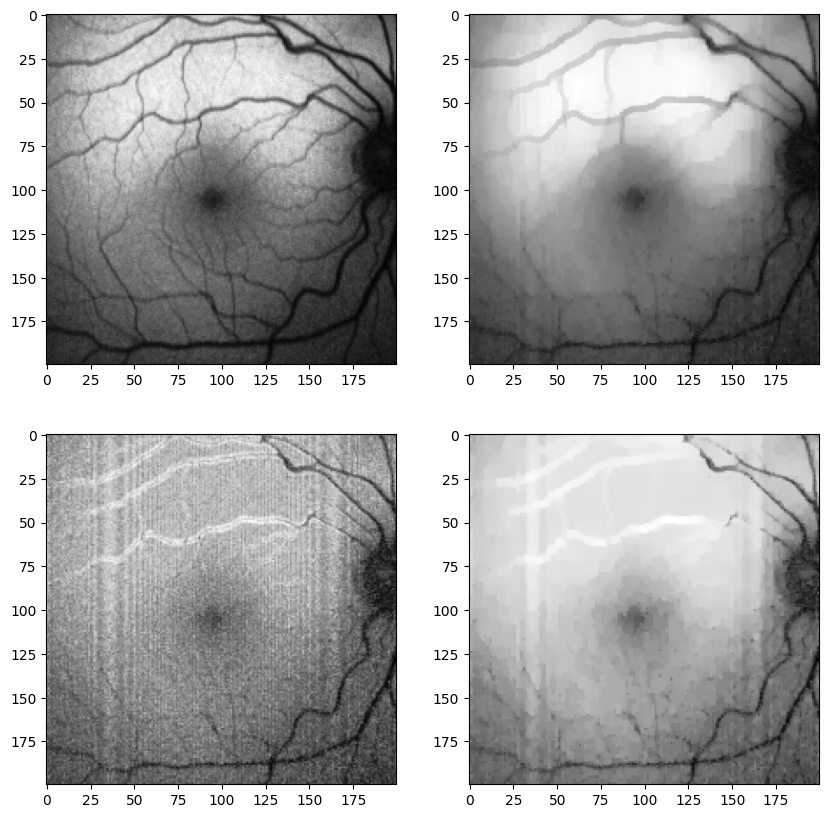

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

small_mu_min = np.min(-small_Mu)
small_mu_max = np.max(-small_Mu)

sol_small_Mu_1_min = np.min(-sol_small_Mu_1)
sol_small_Mu_1_max = np.max(-sol_small_Mu_1)

small_Sig_min = np.min(-small_Sig)
small_Sig_max = np.max(-small_Sig)

sol_small_Sig_1_min = np.min(-sol_small_Sig_1)
sol_small_Sig_1_max = np.max(-sol_small_Sig_1)

axs[0, 0].imshow((-small_Mu-small_mu_min)*(small_mu_max - small_mu_min), 'Greys')
axs[0, 1].imshow((-sol_small_Mu_1-sol_small_Mu_1_min)*(sol_small_Mu_1_max - sol_small_Mu_1_min), 'Greys')
axs[1, 0].imshow((-small_Sig-small_Sig_min)*(small_Sig_max - small_Sig_min), 'Greys')
axs[1, 1].imshow((-sol_small_Sig_1-sol_small_Sig_1_min)*(sol_small_Sig_1_max - sol_small_Sig_1_min), 'Greys')
#fig.savefig('iris-scan_0.1_100_tv_red_proj.pdf', dpi = 300)

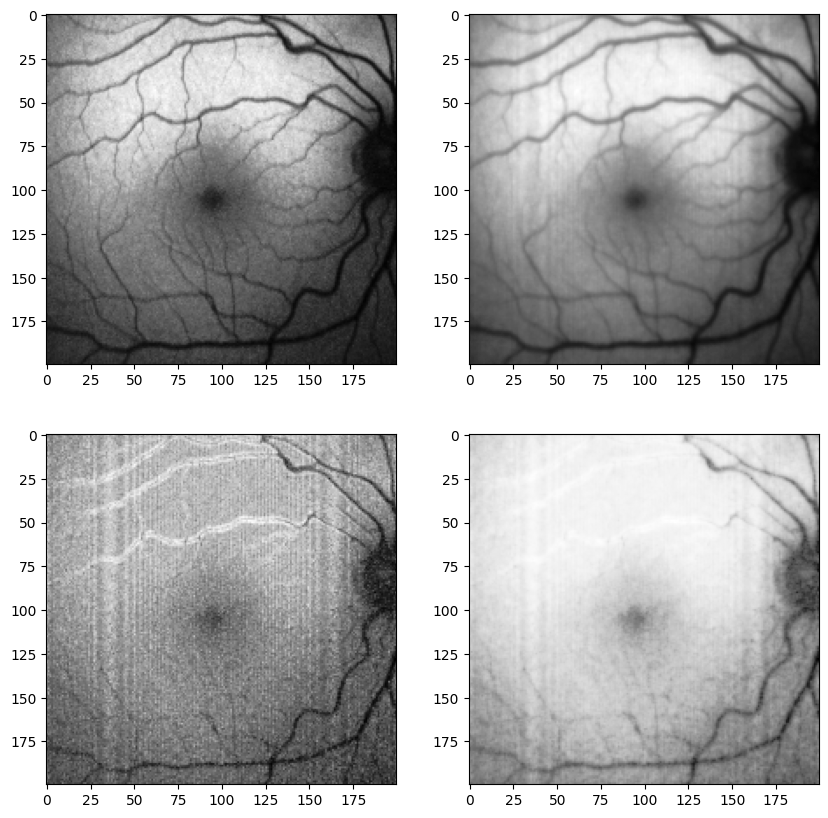

In [237]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].imshow(-small_Mu, 'Greys')
axs[0, 1].imshow(-sol_small_Mu, 'Greys')
axs[1, 0].imshow(-small_Sig, 'Greys')
axs[1, 1].imshow(-sol_small_Sig, 'Greys')

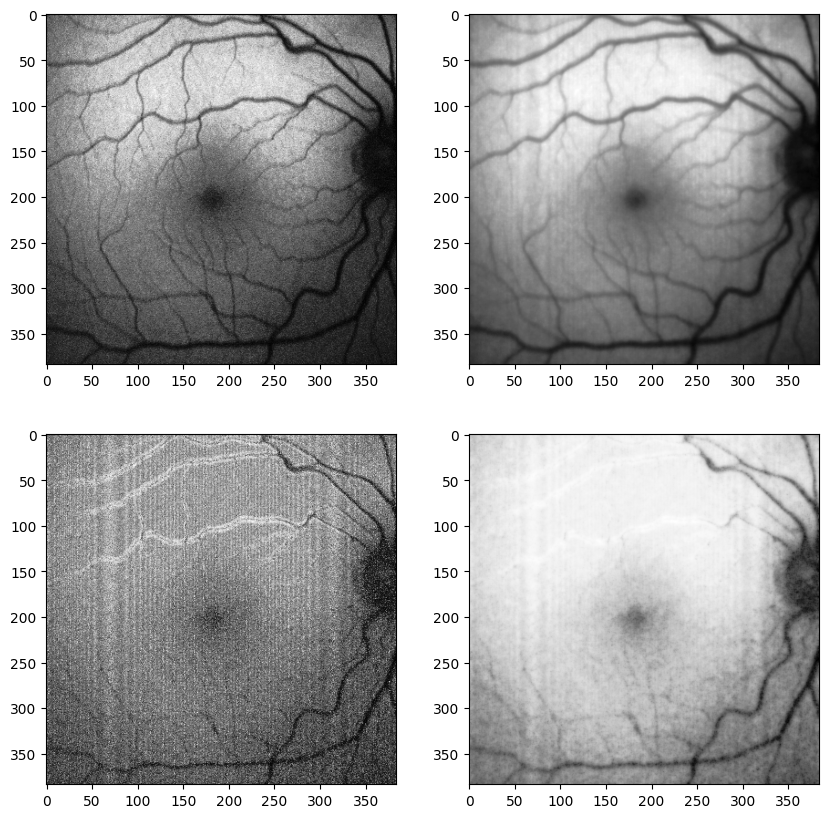

In [228]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].imshow(-Mu, 'Greys')
axs[0, 1].imshow(-sol_Mu, 'Greys')
axs[1, 0].imshow(-Sig, 'Greys')
axs[1, 1].imshow(-sol_Sig, 'Greys')
